
### **Tasks to Perform**

- **Understand the Problem and Setup**: Define objectives, install / import required libraries, and set up the environment for the task.

- **Load and Inspect Data**: Load datasets, inspect their structure, and understand the data's format, columns, and types.

- **Clean the Data**: Handle missing, duplicate, or inconsistent values, correct data types.

- **Conduct Exploratory Data Analysis (EDA)**: Summarize data with statistical and visual tools like histograms, heatmaps, and pair plots to explore patterns and relationships.

- **Train Models**: Select and train appropriate machine learning models for the task (KNN Algorithm).

- **Optimize and Interpret**: Find Optimal K value and fit the model with new K value.

- **Report and Document**: Notedown the observations / insights found while permforming the implementation.

----

### NOTE
- The steps provided are a general guide and not mandatory; adapt them based on the given problem statement, business case, requirements and data.  
- Focus on understanding the problem and performing only the relevant tasks to achieve the objective efficiently.

## Problem Statement
- The objective of this problem is to develop a classification model to predict whether a breast tumor is benign or malignant based on features extracted from a fine needle aspirate of a breast mass.

- The model will assist medical professionals in making accurate and efficient diagnoses of breast cancer. A correct diagnosis can help determine appropriate treatment plans, potentially saving lives by identifying cancerous tumors early.

## Features in Dataset
The dataset contains the following features to describe each tumor:

- **ID Number**: A unique identifier for each patient record.

- **Clump Thickness**: Represents the thickness of the cell clumps, scored from 1 to 10, where higher scores indicate thicker clumps.

- **Uniformity of Cell Size**: Measures the uniformity in the size of cells, with a score from 1 (uniform) to 10 (non-uniform), with higher scores indicating more variability.

- **Uniformity of Cell Shape**: Reflects the consistency in cell shape, scored from 1 to 10, where higher scores indicate more irregular shapes.

- **Marginal Adhesion**: Indicates the degree to which cells stick to each other, rated from 1 (least adhesive) to 10 (most adhesive). More adhesive cells may be associated with malignant tumors.

- **Single Epithelial Cell Size**: Measures the size of individual epithelial cells, scored from 1 to 10. Larger cells may indicate abnormal cell growth.

- **Bare Nuclei**: Refers to cells with bare nuclei, scored from 1 to 10. Missing values in this feature are common, as not all cells have visible nuclei.

- **Bland Chromatin**: Measures the texture of chromatin in the cells, with scores ranging from 1 (fine) to 10 (coarse). Malignant cells tend to have coarser chromatin.

- **Normal Nucleoli**: Scored from 1 to 10, this feature indicates the presence and size of nucleoli in the cells, with higher values indicating more prominent nucleoli, which can be a sign of malignancy.

- **Mitoses**: The count of cell divisions, scored from 1 to 10, with higher values suggesting more active cell division, which is typically associated with malignant tumors.

- **Class**: It is a target variable and indicates whether the tumor is benign or malignant.

- The diagnostic result:
  - 2 = benign (Non-cancerous tumor)
  - 4 = malignant (Cancerous tumor)

## Output Format :  
- The final answer should be a dataframe predictions on the `test_data`(provided to you).
- It should consist of two columns, (ID and Class). Here, class is your prediction.

Sample Output:

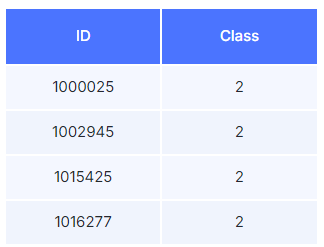

## Evaluation Metric
You need to evaluate your submission using the `score` method.

The evaluation will compare your predicted class labels with the true class labels from the test set, and will be computed as the percentage of correct predictions.

## Completion Criteria
Your submission will be marked as completed if you achieve an matched score more than 65%.

This means that at least 65% of your predictions should be correct.  (where your predicted file will be compared with our true values.)

## Import Required Libraries

In [3]:
import pandas as pd
import numpy as np

## Load Data
- Do not modify the given code. Execute the below code cells sequencially so get the data.1

In [4]:
# Load Data
!wget https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/Breast_cancer_test_data.csv
!wget https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/Breast_Cancer_Wisconsin_Dataset.csv

--2025-09-17 10:28:39--  https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/Breast_cancer_test_data.csv
Resolving new-assets.ccbp.in (new-assets.ccbp.in)... 108.158.251.82, 108.158.251.116, 108.158.251.71, ...
Connecting to new-assets.ccbp.in (new-assets.ccbp.in)|108.158.251.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [text/csv]
Saving to: 'Breast_cancer_test_data.csv'

     0K ..                                                    100% 73.3M=0s

2025-09-17 10:28:39 (73.3 MB/s) - 'Breast_cancer_test_data.csv' saved [2406/2406]

--2025-09-17 10:28:39--  https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/Breast_Cancer_Wisconsin_Dataset.csv
Resolving new-assets.ccbp.in (new-assets.ccbp.in)... 108.158.251.82, 108.158.251.116, 108.158.251.71, ...
Connecting to new-assets.ccbp.in (new-assets.ccbp.in)|108.158.251.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16607 (16K) [text/csv]
Saving to: 'Brea

In [5]:
train_data = pd.read_csv('Breast_Cancer_Wisconsin_Dataset.csv')
test_data = pd.read_csv('Breast_cancer_test_data.csv')

In [6]:
train_data.head()

,ID,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1188472,1,1,1,1,1,1,3,1,1,2
1,1223793,6,10,7,7,6,4,8,10,2,4
2,1174057,4,2,1,1,2,2,3,1,1,2
3,706426,5,5,5,2,5,10,4,3,1,4
4,1131411,1,1,1,2,2,1,2,1,1,2


In [7]:
test_data.head()

,ID,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,76389,10,4,7,2,2,8,6,1,1
1,142932,7,6,10,5,3,10,9,10,2
2,183913,1,2,2,1,2,1,1,1,1
3,255644,10,5,8,10,3,10,5,1,3
4,263538,5,10,10,6,10,10,10,6,5


In [8]:
train_data.isna().sum()

ID                             0
Clump_Thickness                0
Cell_Size_Uniformity           0
Cell_Shape_Uniformity          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [9]:
test_data.isna().sum()

ID                             0
Clump_Thickness                0
Cell_Size_Uniformity           0
Cell_Shape_Uniformity          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

<Axes: xlabel='Cell_Size_Uniformity', ylabel='Cell_Shape_Uniformity'>

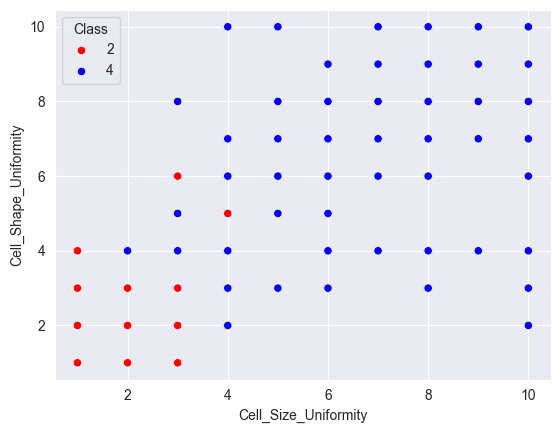

In [10]:
import seaborn as sns
sns.set_style("darkgrid")
sns.scatterplot(data=train_data,x="Cell_Size_Uniformity",y="Cell_Shape_Uniformity",hue="Class",palette=["red","blue"])

## Implementation
- Write the code in the below code cell. Create new code cells if required.
- Build the KNN model on the provided `train_data` import and use the appropriate libraries required for building the model.
- Evaluate the model on `test_data` and get the predictions
- Create a dataframe for test_predictions as `submission_df`

In [11]:
X=train_data.drop(columns=["ID","Class"])
y=train_data["Class"]

In [12]:
# ADD YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,metric="euclidean")
model=knn.fit(X,y)

In [13]:
print(model.predict([[4,2,1,1,2,2,3,1,1]]))
print(model.score(X,y))

[2]
0.978494623655914


C:\Users\Asus\anaconda3\envs\mlproject\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


We can improve the accuracy by tunning hyperparameters

In [14]:
scores=[]
for k in range(3,30):
    knn=KNeighborsClassifier(n_neighbors=k,metric="euclidean")
    model=knn.fit(X,y)
    scores.append(model.score(X,y))
print(scores)

[0.978494623655914, 0.9713261648745519, 0.978494623655914, 0.9767025089605734, 0.982078853046595, 0.9731182795698925, 0.9802867383512545, 0.9731182795698925, 0.9767025089605734, 0.9695340501792115, 0.9767025089605734, 0.9713261648745519, 0.974910394265233, 0.9731182795698925, 0.9731182795698925, 0.9713261648745519, 0.9713261648745519, 0.9713261648745519, 0.9713261648745519, 0.967741935483871, 0.9695340501792115, 0.9659498207885304, 0.9659498207885304, 0.96415770609319, 0.9659498207885304, 0.96415770609319, 0.96415770609319]


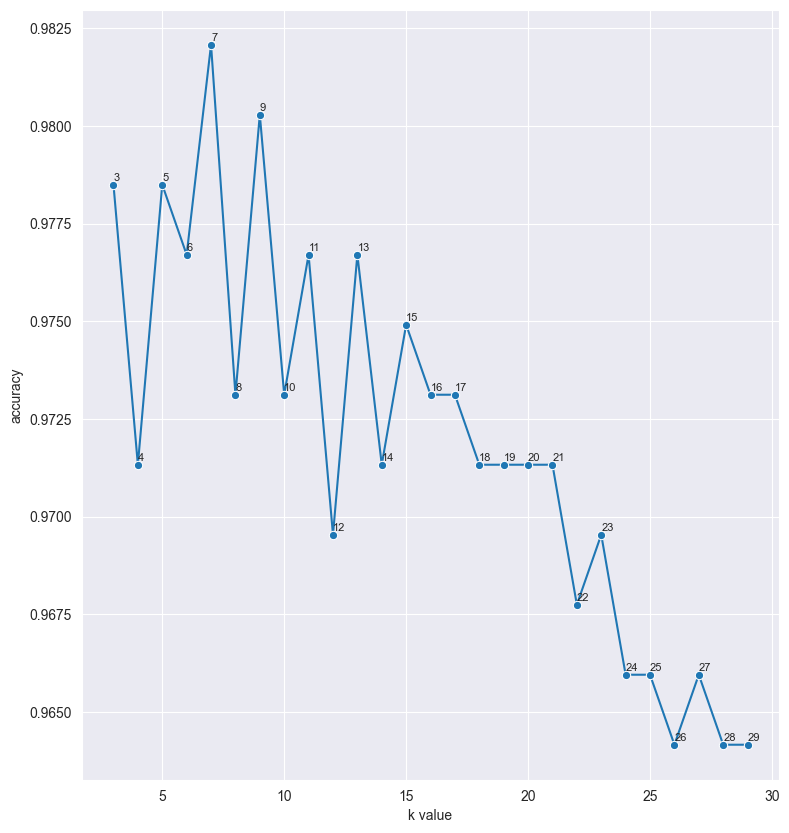

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,10))
sns.lineplot(x=range(3,30),y=scores,marker="o")
for i,score in zip(range(3,30),scores):
    plt.text(i,score+0.0001,str(i),fontsize=8)
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.show()

Clearly we can see that the value of k=7 has the highest accuracy among them

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7,metric="euclidean")
final_model=knn.fit(X,y)
final_model.score(X,y)

0.982078853046595

## Predict on Test data

In [17]:
# Predict on the test data
predictions=final_model.predict(test_data.drop(columns=["ID"]))
predictions

array([4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2])

In [18]:
# create a dataframe of test predictions (ID, Class)
submission_df=pd.DataFrame({"ID":test_data["ID"],"Class":predictions})
submission_df

,ID,Class
0,76389,4
1,142932,4
2,183913,2
3,255644,4
4,263538,4
...,...,...
76,1318169,4
77,1324681,2
78,1368273,2
79,1369821,4


## Your Final Submission
### Instructions  

1. **Write Your Solution in the Provided Code Cell**  
   - Use the code cell provided below for your final solution.  
   - **Do not delete** this code cell or create a new one.  

2. **Avoid Creating New Cells**  
   - If you delete the provided code cell and create a new one to write your code, it will not be evaluated.  
   - In such cases, you will need to create a new copy of the notebook from the platform and re-write your code.  

3. **Follow a Step-by-Step Approach**  
   - Merge your solution step-by-step in the provided code cell:  
     - Start by importing the required libraries.  
     - Load the data.  
     - Perform data pre-processing.  
     - Split the data into training and testing sets.  
     - Build the model.  
     - Evaluate the model.  
   - Ensure the steps are followed in a proper sequence for clarity and correctness.

In [19]:
# write your final code here as per the instructions
import pandas as pd
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Load Data
train_url="https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/Breast_Cancer_Wisconsin_Dataset.csv"
test_url="https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/Breast_cancer_test_data.csv"

train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

X=train_data.drop(columns=["ID","Class"])
y=train_data["Class"]

knn=KNeighborsClassifier(n_neighbors=7,metric="euclidean")
final_model=knn.fit(X,y)

# Predict on the test data
predictions=final_model.predict(test_data.drop(columns=["ID"]))

# create a dataframe of test predictions (ID, Class)
submission_df=pd.DataFrame({"ID":test_data["ID"],"Class":predictions})

submission_df.to_csv("submission_df.csv",index=False)